In [23]:
%matplotlib inline
import numpy as np
import pandas as pd
import nltk

from wordcloud import WordCloud

import matplotlib.pyplot as plt


# Exercise 1
We will build a world cloud on the email content, for this we will use a Python world cloud library and the nltk library for text processing. We will compare a cloud made without any prior processing with one made with different text processing techniques


### Import email data

In [24]:
df = pd.read_csv('hillary-clinton-emails/Emails.csv', sep=',')

### We only care about ExtractedBodyText field and raw text and the subjects

In [25]:
df_extract = df[['ExtractedBodyText']] 
df_raw = df[['RawText']]
df_subj = df[['ExtractedSubject']]

### Check that we don't have null values

In [26]:
df_extract.isnull().values.any()

True

In [27]:
df_extract = df_extract.dropna()
df_subj = df_subj.dropna()

### Get the text from the Data Frame

In [28]:
text = df_extract.sum().iloc[0]
text2 = df_subj.sum().iloc[0]

text = text + " " + text2

### Without text preprocessing:

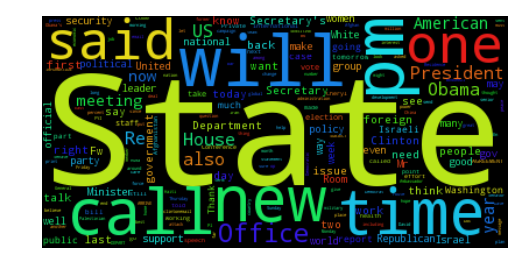

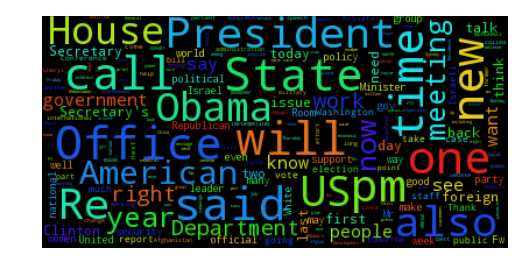

In [29]:
# Generate a word cloud image
wordcloud = WordCloud().generate(text)

#TODO make it prettier/better

# Display the generated image:
plt.imshow(wordcloud)
plt.axis("off")

# lower max_font_size
wordcloud = WordCloud(max_font_size=40).generate(text)
plt.figure()
plt.imshow(wordcloud)
plt.axis("off")
plt.show()


### Text processing discussion
First, we can see on the above wordcloud that some mail boilerplate needs to be taken care of. Words like "Re" or "Cc" is useless.

Secondly some words that are not giving any information need to be removed, like "you".



In [30]:
from nltk.corpus import stopwords
from wordcloud import STOPWORDS

In [31]:
tokens = nltk.word_tokenize(text)
st = nltk.LancasterStemmer()

words_stem = [st.stem(w.lower()) for w in tokens] 
words = [w.lower() for w in tokens]

In [32]:
stopword = stopwords.words('english')

mailword = ["re", "cc", "date", "subject", "sent", "@", ":", "fw", "originalmessage", "pm", "gov", "doc", "also", "n't"]
for w in mailword:
    stopword.append(w)

### Stopword:
Here we manually remove word using the english nltk.corpus words and then we also use the wordcloud stopword list directly in the WordCloud function call, there is no reason to not directly put eveything in the call to WordCloud it's just for practice.

In [33]:
filtered = [word for word in words if word not in stopword]
filtered_text = ' '.join(filtered)

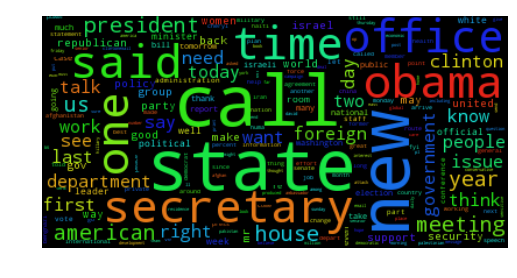

In [34]:
wordcloud = WordCloud(max_font_size=60, stopwords=STOPWORDS).generate(filtered_text)
plt.figure()
plt.imshow(wordcloud)
plt.axis("off")
plt.show()


# Pros and Cons:
blabla
blabla
blabla



# Exercise 2

Bla bla


In [93]:
#Get country corpus
import pycountry
#from nltk.tokenize import sent_tokenize

#Installed the lib directly because nltk didn't include the sentiment package even though I had the latest version installed
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer


In [242]:
df_raw = df[['RawText']].dropna()

text = df_raw.sum().iloc[0]

## Methodology:
For each email, first we separate each sentence in a DF using nltk sent_tokenize and we add a column for each country

Then for each sentence we use the vaderSentiment package to get the sentiment result and for each mentionned country in that sentence we update add the score

Then we sum over all columns to get overall score

In [243]:
# get all sentences
all_sentences = sent_tokenize(text)

#Stemming isn't useful to get country names for example:
print(st.stem('Lybian') )
#lyb is not on pycountry

lyb


In [244]:
len(all_sentences)

169453

In [245]:
#build DF out of sentences and countries
df2 = pd.DataFrame(all_sentences)
countries = [c.name for c in pycountry.countries.objects]

for c in countries:
    df2[c] = 0
    
df2

,0,Aruba,Afghanistan,Angola,Anguilla,Åland Islands,Albania,Andorra,United Arab Emirates,Argentina,...,"Virgin Islands, British","Virgin Islands, U.S.",Viet Nam,Vanuatu,Wallis and Futuna,Samoa,Yemen,South Africa,Zambia,Zimbabwe
0,UNCLASSIFIED\nU.S. Department of State\nCase No.,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,F-2015-04841\nDoc No.,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,C05739545\nDate: 05/13/2015\nSTATE DEPT.,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,- PRODUCED TO HOUSE SELECT BENGHAZI COMM.,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,SUBJECT TO AGREEMENT ON SENSITIVE INFORMATION ...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,NO FOIA WAIVER.,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,"RELEASE IN FULL\nFrom: Sullivan, Jacob J <Sull...",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,please tell her how much Sen. McCain appreciat...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,Me\ntoo\nUNCLASSIFIED\nU.S. Department of Stat...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,F-2015-04841\nDoc No.,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [248]:
#Test
analyzer = SentimentIntensityAnalyzer()
analyzer.polarity_scores("Where is Brian?")

{'compound': 0.0, 'neg': 0.0, 'neu': 1.0, 'pos': 0.0}